In [3]:
%matplotlib inline 
from __future__ import print_function
import numpy as np
import statsmodels.api as sm # Paquete para GLM
from scipy import stats # Estadísticos
from sklearn.metrics import r2_score # Función para calcular R_2
import matplotlib.pyplot as plt # Paquete para la visualización

C:\Users\EEIE\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
# Se cargan los datos desde la api statsmodels
data= sm.datasets.star98.load() # Datos de ejemplo
data.exog=sm.add_constant(data.exog,prepend=False)

Las variables endógenas son equivalentes a la variable dependiente, mientras que las variables exógenas lo son para las variables independientes

In [7]:
glm_binom=sm.GLM(data.endog,data.exog,family=sm.families.Binomial()) # En este caso se asume una regresión binomial en la familia
res= glm_binom.fit()  # Se ajustan el modelo
print(res.summary()) # Se muestra la salida para el modelo utilizado

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2998.6
Date:                Mon, 21 Jan 2019   Deviance:                       4078.8
Time:                        17:42:02   Pearson chi2:                     9.60
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.000    -38.749      0.000      -0.018      -0.016
x2             0.0099      0.001     16.505      0.0

Se definen las variables significativas de acuerdo al valor p, para este caso todas las variables son significativas

In [4]:
print('Total number of trials:',  data.endog[0].sum())
print('Parameters: ', res.params)
print('T-values: ', res.tvalues)

Total number of trials: 807.0
Parameters:  [ -1.68150366e-02   9.92547661e-03  -1.87242148e-02  -1.42385609e-02
   2.54487173e-01   2.40693664e-01   8.04086739e-02  -1.95216050e+00
  -3.34086475e-01  -1.69022168e-01   4.91670212e-03  -3.57996435e-03
  -1.40765648e-02  -4.00499176e-03  -3.90639579e-03   9.17143006e-02
   4.89898381e-02   8.04073890e-03   2.22009503e-04  -2.24924861e-03
   2.95887793e+00]
T-values:  [-38.74908321  16.50473627 -25.1821894  -32.81791308   8.49827113
   4.21247925   5.7749976   -6.16191078  -5.45321673  -5.16865445
   3.92119964 -15.87825999  -7.39093058  -8.44963886  -4.05916246
   6.3210987    6.57434662   5.36229044   7.42806363  -6.44513698
   1.91301155]


## Plots

In [15]:
nobs = res.nobs
y = data.endog[:,0]/data.endog.sum(1) # Como se tomó la familia binomial se hace la transformación de la variable respuesta observada
yhat = res.mu # Valores pronósticados

In [14]:
r2_score(y,yhat) # Estimación del R_2 

0.80038754166199189

Plots yhat vs y

In [16]:
from statsmodels.graphics.api import abline_plot # Función para graficar linea de distribución

En este gráfico se comparan los valores observados y los pronósticados con el objetivos de evaluar que tan bueno es el ajuste del modelo propuesto

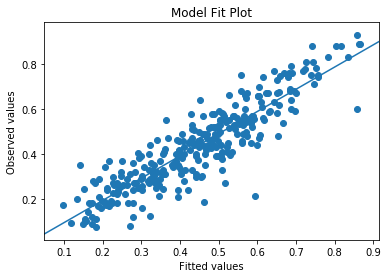

In [17]:
fig,ax=plt.subplots()
ax.scatter(yhat,y)
line_fit=sm.OLS(y,sm.add_constant(yhat,prepend=True)).fit()
abline_plot(model_results=line_fit,ax=ax)

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

Histograma de desviaciones estandarizadas

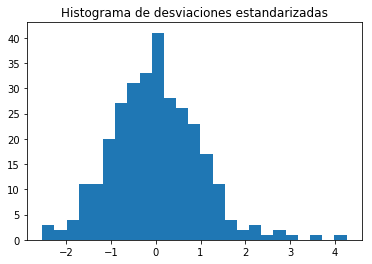

In [18]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histograma de desviaciones estandarizadas');

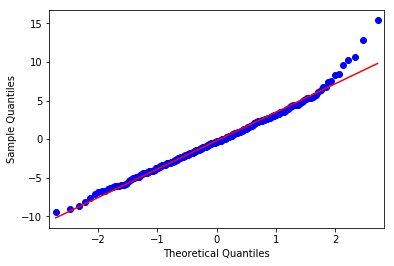

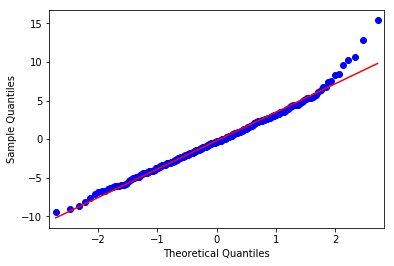

In [19]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

# GLM: Distribución Gamma

In [10]:
data2=sm.datasets.scotland.load()
data2.exog=sm.add_constant(data2.exog,prepend=True)
data2.endog

array([ 60.3,  52.3,  53.4,  57. ,  68.7,  48.8,  65.5,  70.5,  59.1,
        62.7,  51.6,  62. ,  68.4,  69.2,  64.7,  75. ,  62.1,  67.2,
        67.7,  52.7,  65.7,  72.2,  47.4,  51.3,  63.6,  50.7,  51.6,
        56.2,  67.6,  58.9,  74.7,  67.3])

 ### Ajustar

In [11]:
sm.families.Gamma

statsmodels.genmod.families.family.Gamma

In [12]:
glm_gamma=sm.GLM(data2.endog,data2.exog,family=sm.families.Gamma())
glm_results=glm_gamma.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                0.00358428317349
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Fri, 12 Oct 2018   Deviance:                     0.087389
Time:                        16:16:40   Pearson chi2:                   0.0860
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0178      0.011     -1.548      0.122      -0.040       0.005
x1          4.962e-05   1.62e-05      3.060      0.0

C:\Users\EEIE\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:244: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [13]:
nobs = glm_results.nobs
y = data2.endog
yhat = glm_results.mu

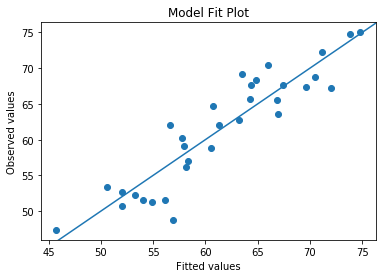

In [14]:
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

In [18]:
r2_score(y,yhat)

0.84361789154086742

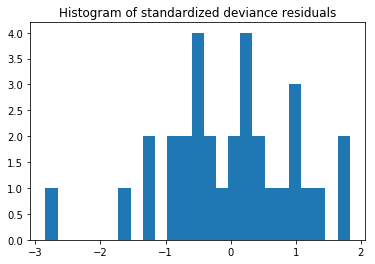

In [15]:
from scipy import stats

fig, ax = plt.subplots()

resid = glm_results.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

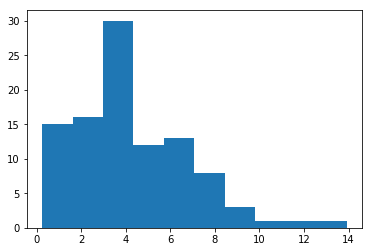

In [16]:
x=np.random.gamma(2,2,100)
plt.hist(x);